Iteration  0


None

None

Iteration  1


None

None

Iteration  2


None

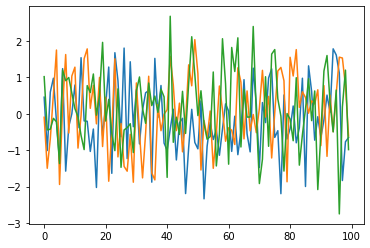

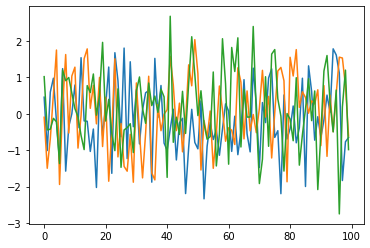

In [55]:
from IPython.display import display
from time import sleep
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import time
%matplotlib inline


#print('Test 1')
#dh = display(pl.plot(pl.randn(100)),display_id=True)
#sleep(1)
#dh.update(pl.plot(pl.randn(100)))



for i in range(3):
    if i == 0:
        a = display(print("Iteration ", i), display_id=i);
        plt.plot(pl.randn(100));
        b=display(plt.gcf(), display_id=i+1);
    else:
        a=display(print("Iteration ", i), display_id=i);
        plt.plot(pl.randn(100));
        b=display(plt.gcf(),display_id=i+1);
    sleep(1)


In [ ]:
from Vissim_env_class import environment
from Actor_Critic_Class import ACAgent
import numpy as np 
from balance_dictionary import balance_dictionary
from DQNAgents import DQNAgent

%matplotlib inline

In [2]:
## Executive Control
timesteps_per_second = 1
agent_type = 'DQN'
agent_h_layer =  [ 3, 3, 5, 1, 2, 4,5,]


# Balance

In [4]:
model_name  = 'Balance'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
sim_length = 3601

# all controller actions
Balance_dictionary = balance_dictionary(agent_type)

In [5]:
env = env(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
          mode = 'training', delete_results = True, verbose = True)

Working Directory set to: C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance.inpx ...
Load process successful
Simulation length set to 3601 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Simulation Object
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                 SETUP COMPLETE                      *
*                                                     *
*******************************************************

Starting Deployments of Signal Control Units
SCUs successfully deployed. Elapsed time 0.67 seconds.


In [6]:
env.SCUs

{0: <Vissim_SCU_class.Signal_Control_Unit at 0x22010f2fc18>,
 1: <Vissim_SCU_class.Signal_Control_Unit at 0x22010f2fda0>,
 2: <Vissim_SCU_class.Signal_Control_Unit at 0x22010f34f28>,
 3: <Vissim_SCU_class.Signal_Control_Unit at 0x22010f47f60>,
 4: <Vissim_SCU_class.Signal_Control_Unit at 0x22010f5ec88>,
 5: <Vissim_SCU_class.Signal_Control_Unit at 0x22010f69f28>,
 6: <Vissim_SCU_class.Signal_Control_Unit at 0x22010f6fac8>,
 7: <Vissim_SCU_class.Signal_Control_Unit at 0x22010f7e3c8>,
 8: <Vissim_SCU_class.Signal_Control_Unit at 0x22010f7ef60>,
 9: <Vissim_SCU_class.Signal_Control_Unit at 0x22010f92128>,
 10: <Vissim_SCU_class.Signal_Control_Unit at 0x22010f92a90>,
 11: <Vissim_SCU_class.Signal_Control_Unit at 0x22010f9f668>,
 12: <Vissim_SCU_class.Signal_Control_Unit at 0x22010fa7240>,
 13: <Vissim_SCU_class.Signal_Control_Unit at 0x22010fa7dd8>}

In [7]:
env.npa

In [8]:
Agents = [DQNAgent(state_size = env.SCUs[idx].state_size, compatible_actions = len(env.SCUs[idx].compatible_actions), ID, state_type = env.SCUs, memory_size,\
         gamma, epsilon_sequence[0], alpha, copy_weights_frequency, Vissim, PER_activated,\
         DoubleDQN = True if agent_type == "DDQN" or "DuelingDDQN" else False,\
         Dueling = False if agent_type == "DQN" or "DDQN" else True) for idx, ID in enumerate(env.npa.signal_controllers_ids)] 

NameError: name 'state_type' is not defined

In [ ]:
env.SCUs[0].state_size

In [ ]:
actions = dict()
for i in range(len(env.SCUs)):
    actions[i]=0
    
print(actions)

In [ ]:
class Cyclic_Control():
    def __init__(self,size):
        self.action = 0
        self.size = size
        
    def choose_action(self,state=None):
        self.action = (self.action + 1) % self.size
        return self.action
CC = [] 

for idx, info in Balance_dictionary.items():
        cycle_size = len(info['compatible_actions'])
        CC.append(Cyclic_Control(cycle_size))

In [ ]:
start_state = env.get_state()
for idx, s in start_state.items():
    actions[idx] = CC[idx].choose_action(s)
    
for _ in range(10000):
    action_required, SARSDs = env.step(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            #print(sarsd)
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = CC[idx].choose_action(ns)
        
    if env.done :
        env.reset()
        for idx, s in start_state.items():
            actions[idx] = CC[idx].choose_action(ns)
        
        

In [ ]:
for i in range(14):
    print(len(env.SCUs[i].compatible_actions))



# Single_Cross_Straight

---> The lack of speed comes from the size of the model (particularly the change of color of the heads). 

In [ ]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

# all controller actions
Single_Cross_Straight_dictionary =\
{\
    # Controller Number 0 
    0 : {'compatible_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues' 
}
}

In [ ]:
env = env(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

env.SCUs


x

In [ ]:
gamma = 0.85
alpha = 0.00005
ID = 0
value = 25
entropy = 0.05
n_step_size = 16
state_size = [4]


# for the monitoring
horizon = 100
n_sample = 10

Agents = []

for idx, info in Single_Cross_Straight_dictionary.items():
        acts = info['compatible_actions']
        Agent = ACAgent(state_size, len(acts), ID, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)


In [ ]:
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

for _ in range(100000):
    action_required, SARSDs = env.step_to_next_action(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            
            #print(sarsd)
            Agents[idx].remember(s,a,r,ns,d)
            if len(Agents[idx].memory) >= Agents[idx].n_step_size :
                Agents[idx].learn() 
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = int(Agents[idx].choose_action(ns))
            #print(actions)
            
    
    # For the saving , monitoring of the agent
    if env.done :
        env.reset()
        for idx, agent in enumerate(Agents):
            predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
            print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
            print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
            print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
            agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)
            
            
            
        
            

Agent 0 : Predicted Values and True Return : 
 [-13.0, -13.0, -13.0, -13.0, -13.0, -13.0, -13.0, -13.0, -13.0, -13.0] 
 [-527.0, -527.0, -527.0, -527.0, -527.0, -527.0, -527.0, -527.0, -527.0, -527.0]
Agent 0 : Proba distribution on those states : 
 [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0.5 0.5]
Agent 0 : Predicted Values and True Return : 
 [-31.0, -31.0, -31.0, -31.0, -31.0, -31.0, -12.0, -31.0, -31.0, -31.0] 
 [-527.0, -527.0, -527.0, -527.0, -527.0, -527.0, -86.0, -527.0, -301.0, -527.0]
Agent 0 : Proba distribution on those states : 
 [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0.53 0.47]
Agent 0 : Predicted Values and True Return : 
 [-34.0, -49.0, -23.0, -49.0, -43.0, -15.0, -49.0, -49.0, -49.0, -24.0] 
 [-54.0, -527.0, -527.

Agent 0 : Predicted Values and True Return : 
 [-25.0, -13.0, -20.0, -31.0, -42.0, -25.0, -16.0, -5.0, -14.0, -5.0] 
 [-527.0, -527.0, -527.0, -527.0, -37.0, -527.0, -527.0, -527.0, -527.0, -527.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 1.0], [0.0, 1.0], [0.94, 0.06], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.37, 0.63], [0.0, 1.0], [0.37, 0.63]]
Agent 0 : Proba distribution on the 0 state : 
 [0.37 0.63]
Agent 0 : Predicted Values and True Return : 
 [-29.0, -20.0, -24.0, -6.0, -10.0, -18.0, -20.0, -6.0, -9.0, -6.0] 
 [-527.0, -228.0, -527.0, -527.0, -527.0, -527.0, -35.0, -527.0, -527.0, -527.0]
Agent 0 : Proba distribution on those states : 
 [[1.0, 0.0], [0.94, 0.06], [0.0, 1.0], [0.43, 0.57], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.43, 0.57], [0.0, 1.0], [0.43, 0.57]]
Agent 0 : Proba distribution on the 0 state : 
 [0.43 0.57]
Agent 0 : Predicted Values and True Return : 
 [-20.0, -10.0, -24.0, -14.0, -17.0, -14.0, -19.0, -13.0, -6.0, -13.0] 
 [-323.0, -453

In [7]:
env.rest


False

# Single_Cross_Triple 4 actions

In [2]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 2000

# all controller actions
Single_Cross_Triple_dictionary4 =\
{\
    # Controller Number 0 
    0 : {'compatible_actions' : {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'green_time' : 10,
         'redamber_time' : 1,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [12],
         'state_type' : 'Queues',
         'reward_type' : 'Queues' 
         }
}

In [3]:
env = env(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

env.SCUs

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Triple.inpx ...
Load process successful
Simulation length set to 2000 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Simulation Object
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                 SETUP COMPLETE                      *
*                                                     *
*******************************************************

0.0936899185180664


{0: <Vissim_SCU_class.Signal_Control_Unit at 0x1fcde8bb7f0>}

In [4]:
# not bad with the first model. need a fonction to decrease entropy now 

gamma = 0.85
alpha = 0.0005
ID = 0
value = 25
entropy = 5000
n_step_size = 11
state_size = [12]
reduce_entropy_every = 1000
entropy_threshold = 0.5


# for the monitoring
horizon = 50
n_sample = 10

Agents = []

for idx, info in Single_Cross_Triple_dictionary4.items():
        acts = info['compatible_actions']
        Agent = ACAgent(state_size, len(acts), ID, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)

Deploying instance of Actor_Critic Agent(s) !!! TENSORFLOW 2 IS NEEDED !!! 
Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  832       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  546       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
__________________________________________________

In [ ]:
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = int(Agents[idx].choose_action(s))

for i in range(30000):
    action_required, SARSDs = env.step_to_next_action(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            
            #print(sarsd)
            Agents[idx].remember(s,a,r,ns,d)
            if len(Agents[idx].memory) >= Agents[idx].n_step_size :
                Agents[idx].learn() 
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = int(Agents[idx].choose_action(ns))
            #print(actions)
            
            if (i+1)%reduce_entropy_every == 0:
                if Agents[idx].params['entropy'] >= entropy_threshold :
                    Agents[idx].reduce_entropy()
                    print ("Agent {} : Entropy reduced to {} " .format(idx, Agents[idx].params['entropy']))
        
    # For the saving , monitoring of the agent
    if env.done :
        env.reset()
        for idx, agent in enumerate(Agents):
            predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
            print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
            print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
            print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
            agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

In [6]:
Agents[0].model.loss

[<bound method ACAgent._logits_loss of <Agent_class.ACAgent object at 0x000002BA33964AC8>>,
 <bound method ACAgent._value_loss of <Agent_class.ACAgent object at 0x000002BA33964AC8>>]

# Single_Cross_Triple 8 actions

In [7]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
    0 : {'compatible_actions' : {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                     4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                     5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                     6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                     7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [12],
         'state_type' : 'Queues',
         'reward_type' : 'Queues' 
         }
}

In [8]:
env = env(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

env.SCUs

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Triple.inpx ...
Failed load attempt 1/5. Re-attempting.
Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Triple.inpx ...
Load process successful
Simulation length set to 3601 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Simulation Object
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                 SETUP COMPLETE                      *
*                            

{0: <Vissim_SCU_class.Signal_Control_Unit at 0x1bbe8d2ca58>}

In [9]:
gamma = 0.85
alpha = 0.00005
ID = 0
value = 25
entropy = 2000
n_step_size = 16
state_size = [12]
reduce_entropy_every = 100



# for the monitoring
horizon = 100
n_sample = 10

## Agents Deployment
Agents = []

for idx, info in Single_Cross_Triple_dictionary8.items():
        acts = info['compatible_actions']
        Agent = ACAgent(state_size, len(acts), ID, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)

Deploying instance of Actor_Critic Agent(s) !!! TENSORFLOW 2 IS NEEDED !!! 
Model: "model2_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  780       
_________________________________________________________________
value2 (Dense)               multiple                  1281      
_________________________________________________________________
value3 (Dense)               multiple                  462       
_________________________________________________________________
value (Dense)                multiple                  22        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  780       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1281      
________________________________________________

In [ ]:
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

for i in range(100000):
    action_required, SARSDs = env.step_to_next_action(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            
            #print(sarsd)
            Agents[idx].remember(s,a,r,ns,d)
            if len(Agents[idx].memory) >= Agents[idx].n_step_size :
                Agents[idx].learn() 
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = int(Agents[idx].choose_action(ns))
            #print(actions)
            
            if (i+1)%reduce_entropy_every == 0:
                Agents[idx].reduce_entropy()
                print ("Agent {} : Entropy reduced to {} " .format(idx, Agents[idx].params['entropy']))
            
    
    # For the saving , monitoring of the agent
    if env.done :
        env.reset()
        for idx, agent in enumerate(Agents):
                    predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
                    print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
                    print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
                    print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
                    agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)
            
            
            
        
            

In [ ]:
env.done


In [ ]:
a = range(5)
b = range(3)

b = [[[] for _ in a] for bla in b]
b

In [ ]:
import numpy as np

In [ ]:
a = 3
def foo():
    global a
    b = a
    for i in range(b):
        print(i)
foo()